In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chisq import EclipseFit
from etv_plots import nice_units, pretty_print, Plotter

In [8]:
fit = EclipseFit('5095')
plot = Plotter('5095')
# planet phase shouldn't matter, so I don't compute it correctly
tp = 158.9
# Orbital solution from Borkovits et al. 2016, assuming equal mass binary
borko = [18.61196, 66.8735, np.radians(86), 0.05, np.radians(270),
         236.26, tp, 0.071*np.cos(np.radians(324)), 0.071*np.sin(np.radians(324)), np.radians(73), np.radians(39),
         1.0, 1.0, 0.018, 0.0, 0.0, 0.0]

# Orbital solution from Getley et al. 2017
getley = [18.61196, 66.8735, np.radians(80), 0.246, np.radians(22.82),
          237.70817, tp, 0.0604*np.cos(np.radians(27.67)), 0.0604*np.sin(np.radians(27.67)), np.radians(105.92), np.radians(64.19 - 305.54),
          1.21, 0.51, 7.698/1047.5, 0.0, 0.0, 0.0]

us = [1.86108497e+01,  6.68620090e+01,  1.49348963,  4.85545154e-01,
        1.88836321,  2.39492268e+02,  9.59231349e+01,  3.76196043e-02,
       -4.03076285e-02,  1.45670131,  5.95255280e-03,  1.08866205,
        1.03721400,  4.58337407e-03,  0.0,  4.51538223,
        77.5036519]

In [10]:
def i_diff(x):
    sim = fit.set_up_sim(x)
    sim.integrate(66.87)
    i_initial = sim.particles[1].inc
    sim.integrate(1500)
    i_final = sim.particles[1].inc
    return np.degrees(i_final - i_initial)

print(i_diff(getley))
print(i_diff(borko))
print(i_diff(us))

0.2828956941407211
-0.566613450431395
0.0002840530050158147


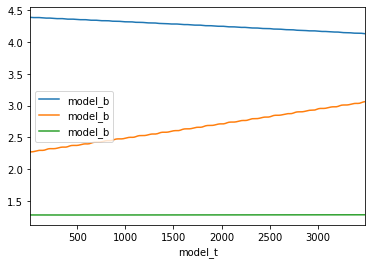

In [16]:
ecl_model, rv_model = fit.get_residuals(np.array(getley))
ax = ecl_model['A'].plot('model_t', 'model_b')
ecl_model, rv_model = fit.get_residuals(np.array(borko))
ecl_model['A'].plot('model_t', 'model_b', ax=ax)
ecl_model, rv_model = fit.get_residuals(np.array(us))
ecl_model['A'].plot('model_t', 'model_b', ax=ax)

In [13]:
# test sinusoidal fit

a = np.vstack((np.ones_like(ecl_model['A']['model_t']),
             ecl_model['A']['model_t'],
             np.sin(2*np.pi*ecl_model['A']['model_t']/118.845), 
             np.cos(2*np.pi*ecl_model['A']['model_t']/118.845))).T
np.linalg.lstsq(a, ecl_model['A']['model_b'])

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


(array([1.27852713e+00, 9.94783644e-07, 1.22424390e-04, 3.77524972e-04]),
 array([1.79457223e-05]),
 4,
 array([2.77196444e+04, 9.70577326e+00, 9.68439098e+00, 6.84998376e+00]))